# Data Wrangling

In this notebook, I will load the data and perform data wrangling techniques to clean data and deal with missing values 

**Table of Contents**

[Loading Modules and Data](#Loading-Modules-and-Data)  
* [Reading File](#Reading-File)
* [Set Index Column](#Set-Index-Column)
* [Renaming Columns](#Renaming-Columns)
* [Visualizing Missing Values](#Visualizing-Missing-Values)
 

[Cleaning Data](#Cleaning-Data)  
* [Numerical Variables](#Numerical-Variables)
* [Categorical Variables](#Categorical-Variables)
* [Outliers](#Outliers)

[Summary](#Summary)  


<a id=’Loading-Modules-and-Data’></a>
## Loading Modules and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno 
%matplotlib inline

<a id=’About-the-Raw-Data’></a>
### About the Raw Data

The dataset is acquired through Kaggle https://www.kaggle.com/ruiqurm/lianjia. It includes house transactions in Beijing from 2011 to 2017, fetching from Lianjia.com

The dataset has the following columms:

**url**: the url which fetches the data<br>
**id**: the id of transaction<br>
**Lng**: and Lat coordinates, using the BD09 protocol.<br>
**Cid**: community id<br>
**tradeTime**: the time of transaction<br>
**DOM**: active days on market.Know more in https://en.wikipedia.org/wiki/Days_on_market<br>
**followers**: the number of people follow the transaction.<br>
**totalPrice**: the total price in 10K CNY<br>
**price**: the average price by square<br>
**square**: the square of house<br>
**livingRoom**: the number of living room. Translation issues, it should labeled as bedroom<br>
**drawingRoom**: the number of drawing room. Translation issues, it should labeled as living room<br>
**kitchen**: the number of kitchen<br>
**bathroom** the number of bathroom<br>
**floor**: the number of floors of the house building and the position of the house (in Chinese characters). <br>
**buildingType**: including tower( 1 ) , bungalow( 2 )，combination of plate and tower( 3 ), plate( 4 ).<br>
**constructionTime**: the time of construction<br>
**renovationCondition**: including other( 1 ), rough( 2 ),basic( 3 ), upgraded( 4 )<br>
**buildingStructure**: including unknown( 1 ), mixed( 2 ), brick and wood( 3 ), brick and concrete( 4 ),steel( 5 ) and steel-concrete composite ( 6 ).<br>
**ladderRatio**: the proportion between number of residents on the same floor and number of elevator of ladder. It describes how many ladders a resident have on average.<br>
**elevator**: have ( 1 ) or not have elevator( 0 )<br>
**fiveYearsProperty**: if the owner have the property for less than 5 years<br>
**subway**: if it is close (1) to subway lines or not(0) <br>
**district**: Beijing Municipality currently comprises 16 administrative county-level subdivisions <br>
**CommunityAverage**: average price/square of that community

<a id=’Reading-File’></a>
#### Reading File

In [2]:
df = pd.read_csv('Beijing House Price.csv', encoding='GBK', parse_dates=True )
pd.set_option('display.float_format', lambda x: '%.2f' % x)

/Users/NancyMao/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.48,40.02,1111027376244,2016-08-09,1464.00,106,415.00,31680,...,1.00,2005,3,6,0.22,1.00,0.00,1.00,7,56021.00
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.45,39.88,1111027381879,2016-07-28,903.00,126,575.00,43436,...,1.00,2004,4,6,0.67,1.00,1.00,0.00,7,71539.00
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.56,39.88,1111040862969,2016-12-11,1271.00,48,1030.00,52021,...,4.00,2005,3,6,0.50,1.00,0.00,0.00,7,48160.00
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.44,40.08,1111043185817,2016-09-30,965.00,138,297.50,22202,...,1.00,2008,1,6,0.27,1.00,0.00,0.00,6,51238.00
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.43,39.89,1111027381174,2016-08-28,927.00,286,392.00,48396,...,4.00,1960,2,2,0.33,0.00,1.00,1.00,1,62588.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
url                    318851 non-null object
id                     318851 non-null object
Lng                    318851 non-null float64
Lat                    318851 non-null float64
Cid                    318851 non-null int64
tradeTime              318851 non-null object
DOM                    160874 non-null float64
followers              318851 non-null int64
totalPrice             318851 non-null float64
price                  318851 non-null int64
square                 318851 non-null float64
livingRoom             318851 non-null object
drawingRoom            318851 non-null object
kitchen                318851 non-null int64
bathRoom               318851 non-null object
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       318851 non-null object
renovationCondition    318851 non-null int64
buildingStruct

In [5]:
#Convert tradetime from string to datetime data
df.tradeTime = pd.to_datetime(df.tradeTime)

<a id=’Set-Index-Column’></a>
#### Set Index Column

In [6]:
print(df.id.unique())

[101084782030 101086012217 101086041636 ... 'BJYZ92324217' 'BJYZ92333313'
 'BJYZ92363553']


The format of the id column is not consistent

In [7]:
#convert all ids as strings and set id as index
df.id = df.id.astype(str)
df = df.set_index('id')

<a id=’Renaming-Coloumns’></a>
#### Renaming Columns

Some of the columns are not labeled correctly due to translation issues

In [8]:
df.columns.values

array(['url', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio',
       'elevator', 'fiveYearsProperty', 'subway', 'district',
       'communityAverage'], dtype=object)

In [9]:
#livingRoom should actually mean bedRoom
df.rename(columns = {'livingRoom':'bedRoom'}, inplace=True)

In [10]:
#drawingRoom should actually mean livingRoom
df.rename(columns = {'drawingRoom':'livingRoom'}, inplace=True)

In [11]:
df.rename(columns = {'square':'squareMeters','price':'pricePerSqMeter'}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318851 entries, 101084782030 to BJYZ92363553
Data columns (total 25 columns):
url                    318851 non-null object
Lng                    318851 non-null float64
Lat                    318851 non-null float64
Cid                    318851 non-null int64
tradeTime              318851 non-null datetime64[ns]
DOM                    160874 non-null float64
followers              318851 non-null int64
totalPrice             318851 non-null float64
pricePerSqMeter        318851 non-null int64
squareMeters           318851 non-null float64
bedRoom                318851 non-null object
livingRoom             318851 non-null object
kitchen                318851 non-null int64
bathRoom               318851 non-null object
floor                  318851 non-null object
buildingType           316830 non-null float64
constructionTime       318851 non-null object
renovationCondition    318851 non-null int64
buildingStructure      318851 non-null i

<a id=’Visualizing-Missing-Values’></a>
#### Visualizing Missing Values

In [13]:
import numpy as np
import missingno as msno 

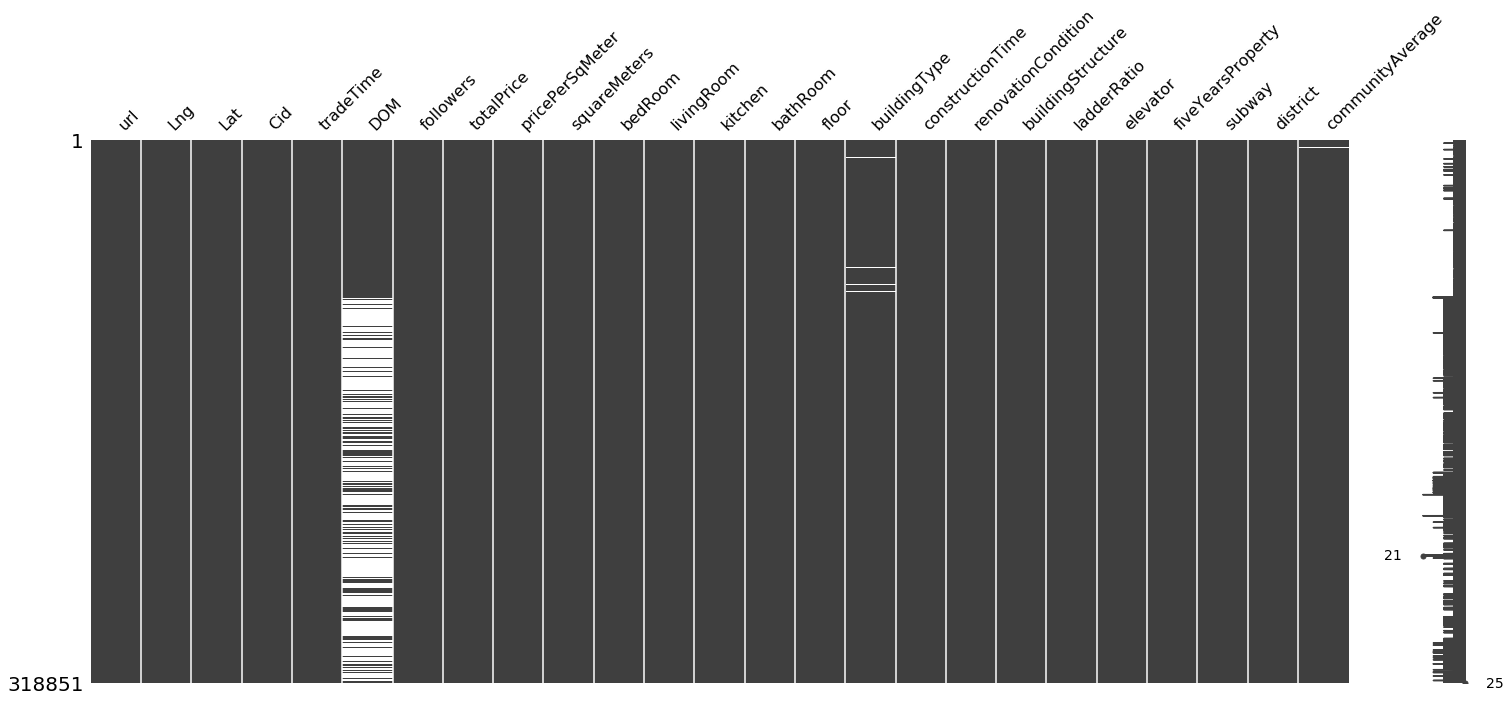

In [14]:
msno.matrix(df) 

 Notice that a large portion of values in DOM column is missing. 

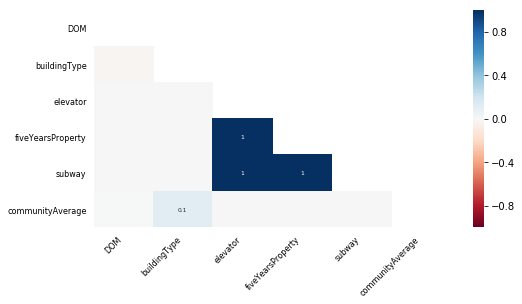

In [15]:
msno.heatmap(df,figsize = (8,4),fontsize = 8)

No significant nullity correlation between columns

<a id=’Cleaning-Data’></a>
### Cleaning Data


<a id=’Numerical-Variables’></a>
#### Numerical Variables

- Numbers of bedRoom, livingRoom and bathRoom should be integers, but show as objects

In [16]:
#check bedRoom values
print(df.bedRoom.unique())

[2 3 1 4 5 6 9 0 7 8 '1' '4' '3' '2' '5' '7' '9' '6' '0' '#NAME?' '8']


In [17]:
#Check number line with missing values in bedRoom
df[df.bedRoom == '#NAME?'].bedRoom.count()

32

In [18]:
#only 32 lines missing values in bedRoom. I will just remove these lines
#drop missing values and store as integer dtype
df = df.drop(df[df.bedRoom == '#NAME?'].index)
df.bedRoom = df.bedRoom.astype(int)

In [19]:
#check livingRoom values
print(df.livingRoom.unique())

[1 2 0 4 3 5 '0' '1' '2' '3' '4' '5']


In [20]:
#Convert livingRoom number as integer dtype
df.livingRoom = df.livingRoom.astype(int)

In [21]:
#check bathRoom values
print(df.bathRoom.unique())

[1 2 3 0 4 5 6 7 '1' '2' '0' '3' '4' '5' '7']


In [22]:
#Convert bathRoom number as integer dtype
df.bathRoom = df.bathRoom.astype(int)

- Missing Values: communityAverage, DOM, constructionTime

In [23]:
#Check number of missing values in CommunityAverage
sum(df.communityAverage.isna())

463

In [24]:
#I will use the most recent value of communityAverage of individual Cid of each year to fill the missing values
a = df.loc[:,['Cid', 'tradeTime','communityAverage']]
a = a.reset_index().set_index('tradeTime').sort_index()
a = a.sort_values('Cid')
#a.to_csv('original.csv')
a['communityAverage'] = a.groupby([pd.Grouper(freq='Y'), 'Cid'])['communityAverage'].ffill()
a = a.reset_index().set_index('id')
#a.to_csv('filled.csv')
df['communityAverage'] = a['communityAverage']
sum(df.communityAverage.isna())
#320 houses with missing values in communityAverage are in communities where no constructionYear available. 

320

In [25]:
#for these houses, I will use the mean of pricePerSqMeter by Cid to fill missing values in communityAverage
a = df[df.communityAverage.isnull()].groupby('Cid')['pricePerSqMeter'].mean()
df.loc[df.communityAverage.isnull(),'communityAverage'] = df['Cid'].map(a)
sum(df.communityAverage.isna())

0

In [26]:
#check distribution on DOM
df.DOM.describe()
#DOM is very skewed

count   160849.00
mean        28.83
std         50.24
min          1.00
25%          1.00
50%          6.00
75%         37.00
max       1677.00
Name: DOM, dtype: float64

Notice that the distribution of DOM is skewed. Because the Days on Markets(DOM) can vary significantly for each year and for each community or district, I will use the median of DOM by year by individual community to fill the missing values first

In [27]:
a = df.loc[:,['Cid', 'tradeTime','DOM']]
a = a.reset_index().set_index('tradeTime')
a['DOM'] = a.groupby([pd.Grouper(freq='Y'), 'Cid']).transform(lambda x: x.fillna(x.median()))
a=a.reset_index().set_index('id')
df['DOM'] = a['DOM']
sum(df.DOM.isna())

14537

there are still missing values left. It means there are communities do not have DOM records for a particular year.
Next, I will use the median of DOM by year by district to fill the rest missing values

In [28]:
a = df.loc[:,['district', 'tradeTime','DOM']]
a = a.reset_index().set_index('tradeTime')
a['DOM'] = a.groupby([pd.Grouper(freq='Y'), 'district']).transform(lambda x: x.fillna(x.median()))
a=a.reset_index().set_index('id')
df['DOM'] = a['DOM']
sum(df.DOM.isna())

6

In [29]:
#there are still 6 missing values left. It means there are communities do not have DOM records for a particular year.
#I will just drop them
df = df[df['DOM'].notna()]

In [30]:
#Check values in constructionTime
print(df.constructionTime.unique())
len(df[df.constructionTime=='未知'])
#'未知' means unknown. 19282 lines with unknown cusntructionTime. 

['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' '未知' '2012' '1989'
 '2003' '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979'
 '1981' '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987'
 '2015' '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963'
 '1967' '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944'
 '1972' '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906'
 '1934' '1914']


19282

In [31]:
# For each community, I will use the most common constructionYear to fill the missing values
a = df.loc[df['constructionTime'] != '未知',['Cid','constructionTime']]
a = a.groupby(['Cid','constructionTime']).size().sort_values(ascending = False).groupby('Cid').head(1)
a = pd.DataFrame(a)
a.reset_index(inplace=True)
a.set_index('Cid', inplace=True)
a.drop(columns=0, inplace=True)
df.loc[df['constructionTime'] == '未知','constructionTime'] = df['Cid'].map(a.constructionTime)
len(df[df.constructionTime.isnull()])
#456 houses with missing values in constructionTime are in communities where no historical constructionYear available. 

456

In [32]:
#I will remove these
df = df.drop(df[df.constructionTime.isnull()].index)

In [33]:
#convert constructionTime in years to int type
df.constructionTime = df.constructionTime.astype(int)

<a id=’Categorical Variables’></a>
#### Categorical Variables

- Missing Values: buildingType

In [34]:
# Missing values in buildingType can just be dropped since there are not many. 
# For practice purpose, I will fill in missing values for communities that just has one buildingType 
print(df.buildingType.unique())
len(df[df.buildingType.isna()])

[ 1.  4.  3. nan  2.]


1824

In [35]:
# For each community, I will use the most common buildingType to fill the missing values
a = df.loc[df.buildingType.notna(),['Cid','buildingType']]
a = a.groupby(['Cid','buildingType']).size().sort_values(ascending = False).groupby('Cid').head(1)
a = pd.DataFrame(a)
a.reset_index(inplace=True)
a.set_index('Cid', inplace=True)
a.drop(columns=0, inplace=True)
df.loc[df.buildingType.isnull(),'buildingType'] = df['Cid'].map(a.buildingType)
len(df[df.buildingType.isnull()])
#642 houses with missing values in buildingType are in communities where no info of buildingType available. 

642

In [36]:
#I will remove these
df = df.drop(df[df.buildingType.isnull()].index)

- floor: this column shows the the relative floor position in the building(high, middle, low) and the total floor number of the building. I will split them into separate variables

In [37]:
print(df.floor)

id
101084782030    高 26
101086012217    高 22
101086041636     中 4
101086406841    底 21
101086920653     中 6
                ... 
BJYZ92311192     中 5
BJYZ92320171    中 24
BJYZ92324217     中 7
BJYZ92333313     中 5
BJYZ92363553    中 17
Name: floor, Length: 317715, dtype: object


In [38]:
df[['floorPosition', 'buildingFloors']]= df.floor.str.split(pat= ' ', expand =True)
df.drop('floor',axis=1,inplace=True)

In [39]:
print(df.floorPosition.unique())
print(df.buildingFloors.unique())

['高' '中' '底' '低' '顶' '未知']
['26' '22' '4' '21' '6' '8' '10' '23' '11' '3' '24' '19' '18' '25' '12'
 '14' '30' '27' '5' '28' '9' '7' '17' '15' '29' '16' '13' '33' '32' '20'
 '31' '2' '1' '34' '42' '37' '36' '35' '63' '57']


In [40]:
len(df[df.floorPosition == '未知'])
# '未知' means unknown. 1264 lines with floor position unknow. I will simply remove these lines

1264

In [41]:
#drop unknown values and convert buildingFloorst as interger
df = df.drop(df[df.floorPosition == '未知'].index)
df.buildingFloors = df.buildingFloors.astype(int)

In [42]:
#Reassign labels for floorPosition
df.floorPosition = df.floorPosition.apply(
    lambda x: 'middle' if x == '中' 
    else ('high' if x == '高' 
          else ('low' if x =='低' 
                else ('bottom' if x == '底' 
                      else ('top' if x == '顶' else x)))))
df.floorPosition = df.floorPosition.astype(str)

- Label creation for buildingType, renovationCondition, buildingStructure, district

In [43]:
df.buildingType = df.buildingType.apply(
    lambda x: 'tower' if x == 1 
    else ('bungalow' if x == 2 
          else ('combination' if x == 3 
                else ('plate' if x == 4
                      else x))))

df.renovationCondition = df.renovationCondition.apply(
    lambda x: 'other' if x == 1 
    else ('rough' if x == 2 
          else ('basic' if x == 3 
                else ('upgraded' if x == 4
                      else x))))

df.buildingStructure = df.buildingStructure.apply(
    lambda x: 'unknown' if x == 1 
    else ('mixed' if x == 2 
          else ('brick and wood' if x == 3 
                else ('brick and concrete' if x == 4
                      else ('steel' if x == 5
                           else ('steel-concrete composite' if x ==6
                                else x))))))

df.district = df.district.apply(
    lambda x: 'DongCheng' if x == 1 
    else ('FengTai' if x == 2 
          else ('YiZhuang BDA' if x == 3 
                else ('DaXing' if x == 4
                      else ('FangShan' if x == 5
                           else ('ChangPing' if x ==6
                                else ('ChaoYang' if x == 7
                                     else ('HaiDian' if x == 8
                                          else ('ShiJingShan' if x == 9
                                               else ('XiCheng' if x == 10
                                                    else ('TongZhou' if x == 11
                                                         else ('ShunYi' if x ==12
                                                              else('MenTouGou' if x ==13
                                                                  else x)))))))))))))






In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316451 entries, 101084782030 to BJYZ92363553
Data columns (total 26 columns):
url                    316451 non-null object
Lng                    316451 non-null float64
Lat                    316451 non-null float64
Cid                    316451 non-null int64
tradeTime              316451 non-null datetime64[ns]
DOM                    316451 non-null float64
followers              316451 non-null int64
totalPrice             316451 non-null float64
pricePerSqMeter        316451 non-null int64
squareMeters           316451 non-null float64
bedRoom                316451 non-null int64
livingRoom             316451 non-null int64
kitchen                316451 non-null int64
bathRoom               316451 non-null int64
buildingType           316451 non-null object
constructionTime       316451 non-null int64
renovationCondition    316451 non-null object
buildingStructure      316451 non-null object
ladderRatio            316451 non-null float

<a id=’Outliers’></a>
#### Outliers
- ladderRatio and totalPrice

In [45]:
df.describe()
# notice that the ladderRatio has a max value of 10009400 which is extremly high
# Also entries that have min totalPrice of 0.1 must be outliers

,Lng,Lat,Cid,DOM,followers,totalPrice,pricePerSqMeter,squareMeters,bedRoom,livingRoom,kitchen,bathRoom,constructionTime,ladderRatio,elevator,fiveYearsProperty,subway,communityAverage,buildingFloors
count,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00,316451.00
mean,116.42,39.95,1125364692606.44,16.33,16.77,348.26,43536.54,83.00,2.01,1.17,0.99,1.19,1999.38,63.64,0.58,0.65,0.60,63691.20,13.32
std,0.11,0.09,1291348023088.21,38.40,34.26,225.63,21667.29,36.42,0.77,0.52,0.10,0.43,8.75,25163.39,0.49,0.48,0.49,22297.63,7.82
min,116.07,39.63,1111027373683.00,1.00,0.00,0.10,1.00,7.37,0.00,0.00,0.00,0.00,1906.00,0.01,0.00,0.00,0.00,10844.00,1.00
25%,116.34,39.89,1111027376254.00,1.00,0.00,205.00,28075.00,57.90,1.00,1.00,1.00,1.00,1994.00,0.25,0.00,0.00,0.00,46352.00,6.00
50%,116.42,39.93,1111027378407.00,1.00,5.00,294.00,38762.00,74.17,2.00,1.00,1.00,1.00,2001.00,0.33,1.00,1.00,1.00,59015.00,11.00
75%,116.48,40.00,1111027380578.00,14.00,18.00,425.00,53833.00,98.56,2.00,1.00,1.00,1.00,2006.00,0.50,1.00,1.00,1.00,75942.00,20.00
max,116.71,40.25,118486728773575.00,1677.00,1143.00,5700.00,156250.00,640.00,9.00,5.00,4.00,7.00,2016.00,10009400.00,1.00,1.00,1.00,183109.00,63.00


Notice that the ladderRatio has a max value of 10009400 which is extremly high and seems abnormal. Also lines that have min totalPrice of 0.1 seems incorrect as well.

In [46]:
print(df.sort_values(by = 'ladderRatio', ascending=False)['ladderRatio'].head(5))
# there are only two entries with ladderRatio of 10009400. I will just remove these two entries

df = df.drop(df[df.ladderRatio == df.ladderRatio.max()].index)

id
101101117242   10009400.00
BJCY87044782   10009400.00
101100278881         10.00
BJCY89147006          5.00
BJCY89660155          5.00
Name: ladderRatio, dtype: float64


To see which entries have incorrect totalPrice values, I will firstly calculate the total price based on Price per sq. meters and the number of sq. meters of the house. 
If the ratio of the totalPrice column and the calculated total Price is not equal to 1, the entry is a possibly outlier with incorrect price info

In [47]:
df['totalPrice_calculated'] = df.pricePerSqMeter * df.squareMeters / 10000
len(df[round(df.totalPrice / df.totalPrice_calculated)!=1])

227

In [48]:
#there are 227 lines with incorrect price info. Remove these lines
df = df.drop(df[round(df.totalPrice / df.totalPrice_calculated)!=1].index)
df.drop('totalPrice_calculated', axis = 1, inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316222 entries, 101084782030 to BJYZ92363553
Data columns (total 26 columns):
url                    316222 non-null object
Lng                    316222 non-null float64
Lat                    316222 non-null float64
Cid                    316222 non-null int64
tradeTime              316222 non-null datetime64[ns]
DOM                    316222 non-null float64
followers              316222 non-null int64
totalPrice             316222 non-null float64
pricePerSqMeter        316222 non-null int64
squareMeters           316222 non-null float64
bedRoom                316222 non-null int64
livingRoom             316222 non-null int64
kitchen                316222 non-null int64
bathRoom               316222 non-null int64
buildingType           316222 non-null object
constructionTime       316222 non-null int64
renovationCondition    316222 non-null object
buildingStructure      316222 non-null object
ladderRatio            316222 non-null float

In [50]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,pricePerSqMeter,squareMeters,bedRoom,livingRoom,kitchen,bathRoom,constructionTime,ladderRatio,elevator,fiveYearsProperty,subway,communityAverage,buildingFloors
count,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00,316222.00
mean,116.42,39.95,1125375075270.77,16.34,16.78,348.51,43567.73,83.00,2.01,1.17,0.99,1.19,1999.38,0.38,0.58,0.65,0.60,63688.96,13.32
std,0.11,0.09,1291815463127.41,38.41,34.27,225.52,21643.66,36.43,0.77,0.52,0.10,0.43,8.76,0.18,0.49,0.48,0.49,22296.67,7.82
min,116.07,39.63,1111027373683.00,1.00,0.00,0.20,44.00,7.37,0.00,0.00,0.00,0.00,1906.00,0.01,0.00,0.00,0.00,10844.00,1.00
25%,116.34,39.89,1111027376254.00,1.00,0.00,205.00,28096.00,57.90,1.00,1.00,1.00,1.00,1994.00,0.25,0.00,0.00,0.00,46352.00,6.00
50%,116.42,39.93,1111027378407.00,1.00,5.00,294.00,38776.00,74.17,2.00,1.00,1.00,1.00,2001.00,0.33,1.00,1.00,1.00,59015.00,11.00
75%,116.48,40.00,1111027380578.00,14.00,18.00,425.00,53847.00,98.56,2.00,1.00,1.00,1.00,2006.00,0.50,1.00,1.00,1.00,75942.00,20.00
max,116.71,40.25,118486728773575.00,1677.00,1143.00,5700.00,156250.00,640.00,9.00,5.00,4.00,7.00,2016.00,10.00,1.00,1.00,1.00,183109.00,63.00


<a id=’Summary’></a>
### Summary
After cleaning the data and removing the outliers, now we have 316222 lines that are ready to use. 
2622 (0.8%) lines are dropped during the data cleaning process. 




In [51]:
df.to_csv('BeijingHousePricing_Cleaned.csv')